# 有限差分法(Finite Difference Method)

## 一维热传导问题的有限差分法
以一维齐次热传导方程初边值问题为例：
$$
\begin{cases}
\frac{\partial u}{\partial t} = a^2 \frac{\partial^2 u}{\partial x^2}, & 0 < x < 1, \, t > 0 \\
u(x, 0) = \sin(\pi x), & 0 \leq x \leq 1 \\
u(0, t) = u(1, t) = 0, & t \geq 0
\end{cases}\tag{3.1}
$$
**网格剖分**：
- 空间区间 $[0,1]$ 剖分：取 $N$ 个单元，空间步长 $h = \frac{1}{N}$，节点 $x_j = jh$（$j = 0,1,\dots,N$）
- 时间区间 $[0,T]$ 剖分：时间步长 $\tau$，时间层$t_n = n\tau$（$n = 0,1,\dots,M$）
- 网格比 $\lambda = \frac{\tau}{h^2}$（抛物型方程核心参数）

**三种核心差分格式**：

（1）向前差分格式
- 格式构造：时间导数用向前差商，空间二阶导数用中心差商
  $$
  \frac{u_j^{n+1} - u_j^n}{\tau} = a^2 \frac{u_{j+1}^n - 2u_j^n + u_{j-1}^n}{h^2} \tag{3.2}
  $$
- 递推公式：$$u_j^{n+1} = (1 - 2a^2\lambda)u_j^n + a^2\lambda(u_{j+1}^n + u_{j-1}^n) \tag{3.3}$$
- 稳定性：条件稳定，需满足 $a^2\lambda \leq \frac{1}{2}$
- 截断误差：$O(\tau + h^2)$

（2）向后差分格式
- 格式构造：时间导数用向后差商，空间二阶导数用中心差商
  $$
  \frac{u_j^{n} - u_j^{n-1}}{\tau} = a^2 \frac{u_{j+1}^n - 2u_j^n + u_{j-1}^n}{h^2} \tag{3.4}
  $$
- 线性方程组：$$-a\lambda u_{j-1}^n + (1 + 2a^2\lambda)u_j^n - a^2\lambda u_{j+1}^n = u_j^{n-1} \tag{3.5}$$
- 稳定性：无条件稳定（任意 $\lambda > 0$ 均稳定）
- 截断误差：$O(\tau + h^2)$

（3）Crank-Nicolson格式
- 格式构造：时间导数用中心差商，空间二阶导数取 $n$ 层和 $n+1$ 层平均
  $$
  \frac{u_j^{n+1} - u_j^n}{\tau} = \frac{a^2}{2h^2}\left[(u_{j+1}^{n+1} - 2u_j^{n+1} + u_{j-1}^{n+1}) + (u_{j+1}^n - 2u_j^n + u_{j-1}^n)\right] \tag{3.6}
  $$
- 线性方程组：$$-\frac{a^2\lambda}{2}u_{j-1}^{n+1} + (1 + a^2\lambda)u_j^{n+1} - \frac{a^2\lambda}{2}u_{j+1}^{n+1} = \frac{a^2\lambda}{2}(u_{j+1}^n + u_{j-1}^n) + (1 - a^2\lambda)u_j^n \tag{3.7}$$
- 稳定性：无条件稳定
- 截断误差：$O(\tau^2 + h^2)$

下面给出一维热传导基准问题的代码供大家参考：

稳定性参数 r = 0.4000
稳定性条件: r <= 0.5, 满足

开始进行有限差分迭代...
有限差分迭代完成！耗时: 1.90 秒 (0.03 分钟)
L2 误差: 1.295978e-05


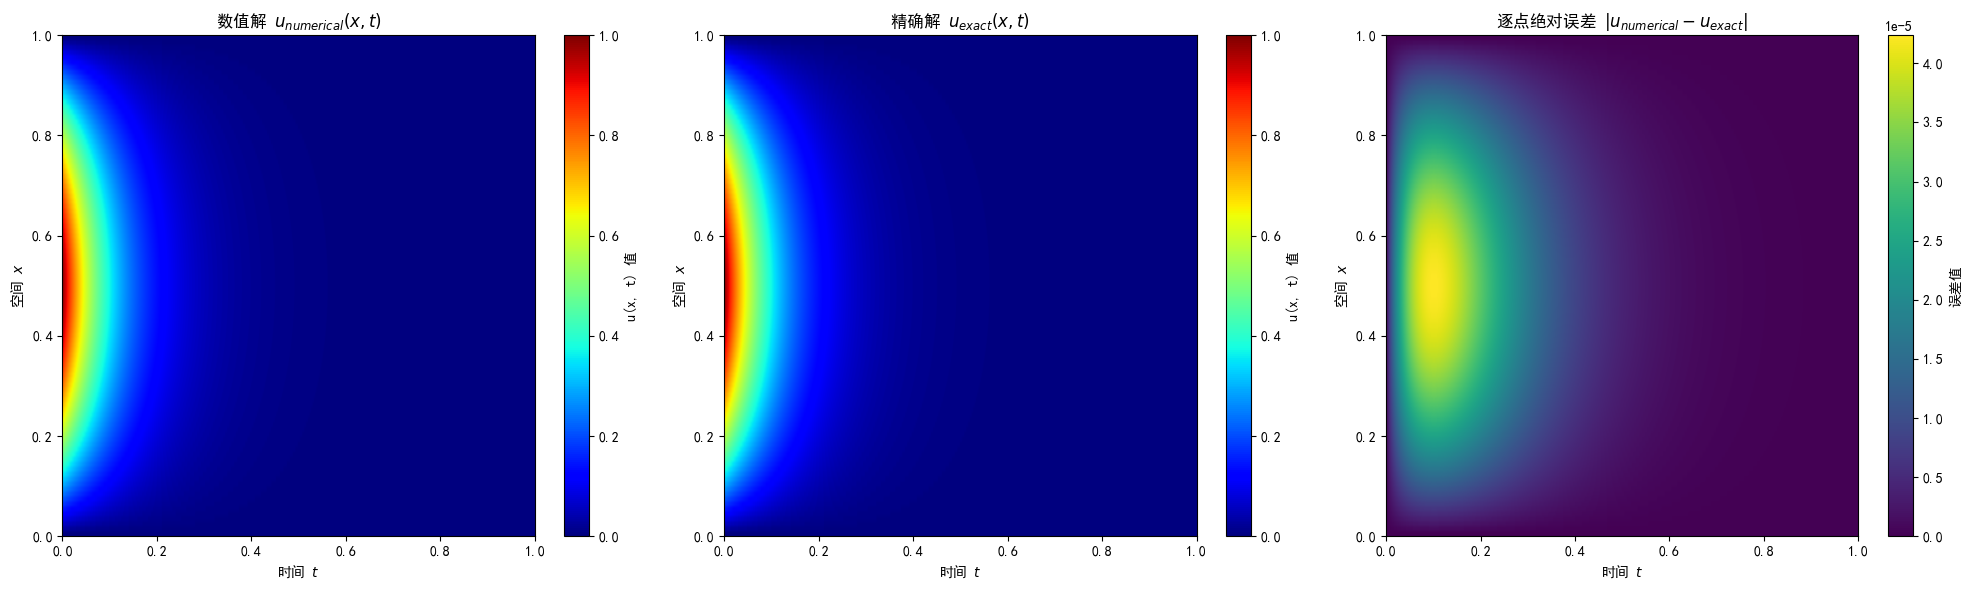

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time 

# 中文显示支持
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 设置随机种子以确保结果可重复
np.random.seed(1224)

# 1. 参数设置与数值求解
N = 100  # 空间网格数
M = 25000  # 时间步数
L = 1.0  # 空间长度
T = 1.0  # 总时间

# 计算步长
h = L / N  # 空间步长
tau = T / M  # 时间步长

# 稳定性检查
r = tau / (h ** 2) # 稳定性参数
print(f"稳定性参数 r = {r:.4f}")
print(f"稳定性条件: r <= 0.5, {'满足' if r <= 0.5 else '不满足'}")

# 初始化网格
x = np.linspace(0, L, N + 1)  # 空间网格
t = np.linspace(0, T, M + 1)  # 时间网格
u_numerical = np.zeros((N + 1, M + 1))  # 数值解, u[空间, 时间]

# 设置初始条件和边界条件
u_numerical[:, 0] = np.sin(np.pi * x) # 初始条件 u(x,0) = sin(pi*x)
u_numerical[0, :] = 0.0 # 边界条件 u(0,t) = 0
u_numerical[N, :] = 0.0 # 边界条件 u(L,t) = 0

# 记录迭代开始时间
print("\n开始进行有限差分迭代...")
start_time = time.time()

# 有限差分迭代
for n in range(M): # 时间步迭代
    for i in range(1, N): # 空间点迭代
        u_numerical[i, n + 1] = u_numerical[i, n] + r * (u_numerical[i + 1, n] - 2 * u_numerical[i, n] + u_numerical[i - 1, n])

# 记录迭代结束时间并计算耗时
end_time = time.time()
elapsed_time = end_time - start_time # 计算耗时
print(f"有限差分迭代完成！耗时: {elapsed_time:.2f} 秒 ({elapsed_time/60:.2f} 分钟)")

# 2. 计算整个时空域上的精确解和误差
# 初始化精确解和误差数组
u_exact = np.zeros((N + 1, M + 1))
pointwise_abs_error = np.zeros((N + 1, M + 1))

# 对每个时间步和空间点计算精确解和误差
for n in range(M + 1):
    current_t = t[n] # 当前时间
    # 精确解公式
    u_exact[:, n] = np.exp(- (np.pi ** 2) * current_t) * np.sin(np.pi * x)
    # 逐点绝对误差
    pointwise_abs_error[:, n] = np.abs(u_numerical[:, n] - u_exact[:, n])

# L2 误差计算 (整个时空域)
l2_error = np.sqrt(h * tau * np.sum((u_numerical - u_exact) ** 2, axis=None))
print(f"L2 误差: {l2_error:.6e}")

# 3. 绘制热力图
# 设置图像大小和布局
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# 定义一个通用的 extent，适用于所有子图
extent = [t.min(), t.max(), x.min(), x.max()]

# 1. 数值解热力图
im1 = axes[0].imshow(u_numerical, extent=extent, origin='lower', aspect='auto', cmap='jet')
axes[0].set_title('数值解 $u_{numerical}(x, t)$')
axes[0].set_xlabel('时间 $t$')
axes[0].set_ylabel('空间 $x$')
plt.colorbar(im1, ax=axes[0], label='u(x, t) 值')

# 2. 精确解热力图
im2 = axes[1].imshow(u_exact, extent=extent, origin='lower', aspect='auto', cmap='jet')
axes[1].set_title('精确解 $u_{exact}(x, t)$')
axes[1].set_xlabel('时间 $t$')
axes[1].set_ylabel('空间 $x$')
plt.colorbar(im2, ax=axes[1], label='u(x, t) 值')

# 3. 逐点绝对误差热力图
im3 = axes[2].imshow(pointwise_abs_error, extent=extent, origin='lower', aspect='auto', cmap='viridis')
axes[2].set_title('逐点绝对误差 $|u_{numerical} - u_{exact}|$')
axes[2].set_xlabel('时间 $t$')
axes[2].set_ylabel('空间 $x$')
plt.colorbar(im3, ax=axes[2], label='误差值')

plt.tight_layout() # 调整子图间距
plt.show()

## 高维热传导问题的有限差分法
先考虑二维矩形区域 $\Omega=(0,l_x)\times(0,l_y)$ 上的齐次热传导问题，其控制方程为：
$$
\begin{cases}
\frac{\partial u}{\partial t} = a^2 \left( \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} \right), & 0 < x < l_x,\ 0 < y < l_y,\ t > 0, \\
u(x, y, 0) = \varphi(x, y), & 0 \leq x \leq l_x,\ 0 \leq y \leq l_y, \\
u(0, y, t) = u(l_x, y, t) = 0, & 0 \leq y \leq l_y,\ t \geq 0, \\
u(x, 0, t) = u(x, l_y, t) = 0, & 0 \leq x \leq l_x,\ t \geq 0.
\end{cases} \tag{3.8}
$$

通过“空间+时间”的离散化，将连续问题转化为离散节点的代数方程组：
- 空间离散：  
  $ x $ 方向：划分 $ N $ 等份，步长 $ h_x = \frac{l_x}{N} $，节点 $ x_i = i h_x \ (i=0,1,\dots,N) $；  
  $ y $ 方向：划分 $ M $ 等份，步长 $ h_y = \frac{l_y}{M} $，节点 $ y_j = j h_y \ (j=0,1,\dots,M) $；  
  形成二维网格节点 $ (x_i,y_j) $，覆盖整个区域 $ \Omega $。  
- 时间离散：  
  时间步长 $ \tau $，离散时刻 $ t_k = k \tau \ (k=0,1,\dots) $，记 $ u_{i,j}^k = u(x_i,y_j,t_k) $（节点 $(x_i,y_j)$ 在时刻 $ t_k $ 的数值解）。

采用有限差分方法逼近偏导数：
- **时间导数**（显式格式：向前差分）：  
  $$ \frac{\partial u}{\partial t}(x_i,y_j,t_k) = \frac{u_{i,j}^{k+1} - u_{i,j}^k}{\tau} \tag{3.9}$$
- **空间二阶导数**（中心差分，精度更高）：  
  $$ \frac{\partial^2 u}{\partial x^2}(x_i,y_j,t_k) = \frac{u_{i+1,j}^k - 2u_{i,j}^k + u_{i-1,j}^k}{h_x^2} \tag{3.10}$$
  $$ \frac{\partial^2 u}{\partial y^2}(x_i,y_j,t_k) = \frac{u_{i,j+1}^k - 2u_{i,j}^k + u_{i,j-1}^k}{h_y^2} \tag{3.11}$$


将差分近似代入控制方程 (3.8)，整理得二维显式离散格式：
$$ u_{i,j}^{k+1} = u_{i,j}^k + r_x \left( u_{i+1,j}^k - 2u_{i,j}^k + u_{i-1,j}^k \right) + r_y \left( u_{i,j+1}^k - 2u_{i,j}^k + u_{i,j-1}^k \right) \tag{3.12} $$
其中：
- $ r_x = \frac{a^2 \tau}{h_x^2} $，$ r_y = \frac{a^2 \tau}{h_y^2} $ 为稳定性系数；  
- 稳定性条件：$ r_x + r_y \leq \frac{1}{2} $ ，否则数值解会出现振荡或发散。


### 有限差分法高维问题带来的挑战
1. **网格规模指数级膨胀**  
   一维问题节点数为 $ O(N) $，二维为 $ O(NM) $，三维为 $ O(NMP) $。例如：若各维度均划分 100 等份，一维仅 101 个节点，二维达 10201 个，三维则为 1030301 个，存储和计算量呈指数增长，即“维度灾难”。

2. **稳定性约束更严格**  
   一维显式格式的稳定性条件为 $ r \leq \frac{1}{2} $，而二维需满足 $ r_x + r_y \leq \frac{1}{2} $。若 $ h_x = h_y = h $，则 $ r_x = r_y = r $，条件变为 $ r \leq \frac{1}{4} $，时间步长 $ \tau $ 需更小，导致计算效率大幅下降。

3. **计算复杂度显著提升**  
   一维问题每个时间步仅需更新 $ N-1 $ 个内部节点，二维需更新 $ (N-1)(M-1) $ 个，三维则为 $ (N-1)(M-1)(P-1) $ 个。同时，高维问题的边界处理更复杂（如三维问题需考虑面、边、角节点的边界条件）。

下面给出二维热传导问题的代码供大家参考：

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

# 中文显示支持
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 设置随机种子以确保结果可重复
np.random.seed(1224)

# 1. 参数设置与数值求解
N = 100   # 空间网格数 (x方向和y方向相同)
M = 50000 # 时间步数
Lx = 1.0  # x方向长度
Ly = 1.0  # y方向长度
T = 1.0   # 总时间

# 计算步长
hx = Lx / N  # x方向空间步长
hy = Ly / N  # y方向空间步长
tau = T / M  # 时间步长

# 稳定性检查 (二维向前差分格式：r_x + r_y <= 0.5)
a_sq = 1.0  # 扩散系数a² (默认1.0)
r_x = a_sq * tau / (hx ** 2)  # x方向稳定性参数
r_y = a_sq * tau / (hy ** 2)  # y方向稳定性参数
print(f"x方向稳定性参数 r_x = {r_x:.4f}")
print(f"y方向稳定性参数 r_y = {r_y:.4f}")
print(f"稳定性条件: r_x + r_y <= 0.5, {'满足' if (r_x + r_y) <= 0.5 else '不满足'}")
print(f"当前 r_x + r_y = {r_x + r_y:.4f}")

# 初始化网格
x = np.linspace(0, Lx, N + 1)  # x方向网格
y = np.linspace(0, Ly, N + 1)  # y方向网格
t = np.linspace(0, T, M + 1)  # 时间网格
u_numerical = np.zeros((N + 1, N + 1, M + 1))  # 数值解, u[x, y, t]

# 设置初始条件和边界条件
# 初始条件: u(x,y,0) = sin(πx) * sin(πy) (二维正弦分布)
X, Y = np.meshgrid(x, y, indexing='ij')  # 生成二维网格 (x为行，y为列)
u_numerical[:, :, 0] = np.sin(np.pi * X) * np.sin(np.pi * Y)

# 边界条件: 四个边界均为0 (齐次Dirichlet)
u_numerical[0, :, :] = 0.0  # x=0边界
u_numerical[N, :, :] = 0.0  # x=Lx边界
u_numerical[:, 0, :] = 0.0  # y=0边界
u_numerical[:, N, :] = 0.0  # y=Ly边界

# 记录迭代开始时间
print("\n开始进行二维有限差分迭代...")
start_time = time.time()

# 有限差分迭代 (二维向前差分格式)
for n in range(M):  # 时间步迭代
    # 内部节点更新 (跳过边界)
    for i in range(1, N):
        for j in range(1, N):
            # 二维向前差分格式公式
            u_numerical[i, j, n + 1] = u_numerical[i, j, n] + \
                                       r_x * (u_numerical[i + 1, j, n] - 2 * u_numerical[i, j, n] + u_numerical[i - 1, j, n]) + \
                                       r_y * (u_numerical[i, j + 1, n] - 2 * u_numerical[i, j, n] + u_numerical[i, j - 1, n])

# 记录迭代结束时间并计算耗时
end_time = time.time()
elapsed_time = end_time - start_time  # 计算耗时
print(f"二维有限差分迭代完成！耗时: {elapsed_time:.2f} 秒 ({elapsed_time / 60:.2f} 分钟)")

# 2. 计算整个时空域上的精确解和误差
# 初始化精确解和误差数组
u_exact = np.zeros((N + 1, N + 1, M + 1))
pointwise_abs_error = np.zeros((N + 1, N + 1, M + 1))

# 对每个时间步计算精确解和误差
for n in range(M + 1):
    current_t = t[n]  # 当前时间
    # 二维热传导方程精确解 (与初始条件匹配)
    u_exact[:, :, n] = np.exp(-a_sq * np.pi ** 2 * (1 + 1) * current_t) * np.sin(np.pi * X) * np.sin(np.pi * Y)
    # 逐点绝对误差
    pointwise_abs_error[:, :, n] = np.abs(u_numerical[:, :, n] - u_exact[:, :, n])

# L2 误差计算 (整个时空域)
l2_error = np.sqrt(hx * hy * tau * np.sum((u_numerical - u_exact) ** 2, axis=None))

# 3 误差统计分析
max_error = np.max(pointwise_abs_error)
mean_error = np.mean(pointwise_abs_error)
print(f"\n误差统计 (整个时空域):")
print(f"最大绝对误差: {max_error:.6f}")
print(f"平均绝对误差: {mean_error:.6f}")
print(f"L2 误差: {l2_error:.6e}")

x方向稳定性参数 r_x = 0.2000
y方向稳定性参数 r_y = 0.2000
稳定性条件: r_x + r_y <= 0.5, 满足
当前 r_x + r_y = 0.4000

开始进行二维有限差分迭代...
二维有限差分迭代完成！耗时: 884.29 秒 (14.74 分钟)

误差统计 (整个时空域):
最大绝对误差: 0.000042
平均绝对误差: 0.000002
L2 误差: 6.479893e-06


有兴趣的读者可以尝试将有限差分法应用于求解更高维（如三维）的热传导问题。然而，一个不可避免的挑战是，当问题从一维过渡到二维乃至三维时，为了保持相同的空间分辨率（即每个维度上的网格数相同）和数值稳定性（即保持稳定性参数如$r_x, r_y, r_z$在临界值内），计算网格的总节点数会呈指数级增长（例如，从 $N$ 个节点到 $N^2$ 再到 $N^3$）。这直接导致了计算量和内存需求的急剧增加，进而使得求解时间成倍甚至成百上千倍地增长，严重影响了计算效率和可行性。

因此，虽然有限差分法在求解一维热传导问题时能展现出极高的效率和良好的性能，但当问题扩展到二维，特别是三维时，其对计算资源的巨大需求使其逐渐暴露出效率低下的短板，这也促使研究人员探索更高效的数值方法或寻求高性能计算的支持。